# US Pollution 2000-2021
This dataset contains air pollution data in the US from 2000 to 2021. It covers O3, CO, SO2 and NO2 concentration and their Air Quality Index. The dataset was derived from [EPA](https://www.epa.gov/) provided data and underwent preprocessing. It was downloaded from [Kaggle](https://www.kaggle.com/alpacanonymous/us-pollution-20002021).

## My questions
1. How does yearly emission of pollutants change in the two decades?
2. In which season does each pollutant tend to have high concentration?

## Loading data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/pollution_2000_2021.csv')

## pd.describe()

In [2]:
print(df.describe())

                Year          Month            Day        O3 Mean  \
count  608699.000000  608699.000000  608699.000000  608699.000000   
mean     2011.040529       6.508670      15.737176       0.028477   
std         6.122558       3.310633       8.806949       0.012218   
min      2000.000000       1.000000       1.000000      -0.000706   
25%      2006.000000       4.000000       8.000000       0.019647   
50%      2012.000000       7.000000      16.000000       0.028235   
75%      2016.000000       9.000000      23.000000       0.036765   
max      2021.000000      12.000000      31.000000       0.107353   

       O3 1st Max Value  O3 1st Max Hour         O3 AQI        CO Mean  \
count     608699.000000    608699.000000  608699.000000  608699.000000   
mean           0.038903        10.773469      39.112517       0.337258   
std            0.015031         3.308152      22.480864       0.282958   
min            0.000000         7.000000       0.000000      -0.437500   
25%     

## Analyzing my dataset

### The array of columns and the index array

In [3]:
print(df.columns)
print(df.index)

Index(['Date', 'Year', 'Month', 'Day', 'Address', 'State', 'County', 'City',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI'],
      dtype='object')
RangeIndex(start=0, stop=608699, step=1)


### Some simple plots

#### AQI distributions

array([[<AxesSubplot:title={'center':'O3 AQI'}>,
        <AxesSubplot:title={'center':'CO AQI'}>],
       [<AxesSubplot:title={'center':'SO2 AQI'}>,
        <AxesSubplot:title={'center':'NO2 AQI'}>]], dtype=object)

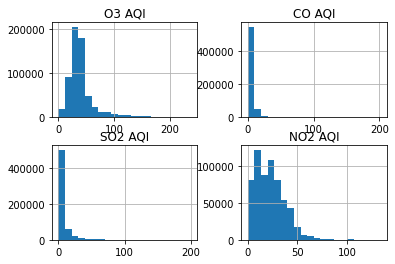

In [4]:
df.hist(['O3 AQI', 'CO AQI', 'SO2 AQI', 'NO2 AQI'], bins=20)

#### NO2 AQI in Winter Park against date

Text(0.5, 1.0, 'NO2 AQI in Winter Park')

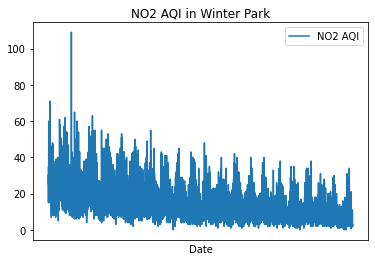

In [5]:
df[df['City'] == 'Winter Park'].plot('Date', 'NO2 AQI')
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)  # Remove tick labels
plt.title('NO2 AQI in Winter Park')

### Pivot tables and plotting

       CO Mean   NO2 Mean   O3 Mean  SO2 Mean
Year                                         
2000  0.554411  17.404993  0.026569  3.643767
2001  0.512427  17.572878  0.027640  3.249895
2002  0.497511  16.334337  0.029079  2.796563
2003  0.490883  15.877995  0.027643  2.910570
2004  0.450355  15.042115  0.026913  2.971342
2005  0.421747  15.073970  0.027924  3.031855
2006  0.396596  14.301465  0.028297  2.645756
2007  0.367583  13.165632  0.028708  2.363346
2008  0.324247  12.141117  0.028287  1.914403
2009  0.322689  11.452351  0.027226  1.554269
2010  0.321201  11.235663  0.028798  1.301937
2011  0.307117  11.145716  0.028802  1.212526
2012  0.300725  10.581060  0.029319  0.964765
2013  0.277498  10.479755  0.028508  0.861701
2014  0.275702  10.029730  0.028230  0.874203
2015  0.281823   9.461669  0.028386  0.746485
2016  0.263482   8.993702  0.028762  0.572334
2017  0.262722   8.946071  0.029139  0.551131
2018  0.268630   8.873055  0.028790  0.503567
2019  0.248403   9.533735  0.02894

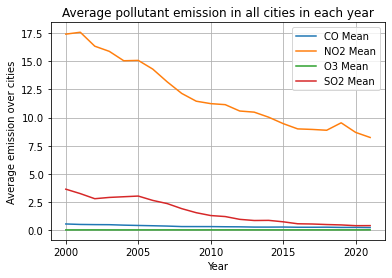

In [6]:
# Averages over the years. See a decreasing trend.
df_year = df.pivot_table(index=['Year'], values=['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean'], aggfunc=np.mean)
print(df_year)

df_year.plot()
plt.title('Average pollutant emission in all cities in each year')
plt.ylabel('Average emission over cities')
plt.grid()

                CO Mean   NO2 Mean   O3 Mean  SO2 Mean
City                                                  
Albuquerque    0.215085  10.865637  0.034981  0.579792
Alexandria     0.310460  17.949247  0.031887  2.937927
Altoona        0.154131   9.802171  0.030418  4.151453
Annandale      0.478949  14.914023  0.030167  5.047360
Arden-Arcade   0.370411   9.258798  0.028366  0.952418
...                 ...        ...       ...       ...
Wilkes-Barre   0.208728   9.360137  0.030749  3.111206
Wilmington     0.252862  10.811691  0.028282  0.712933
Winston-Salem  0.461236  10.937148  0.038679  3.764752
Winter Park    0.448425   6.786697  0.029220  0.427436
York           0.208884  11.999344  0.031001  2.778197

[148 rows x 4 columns]


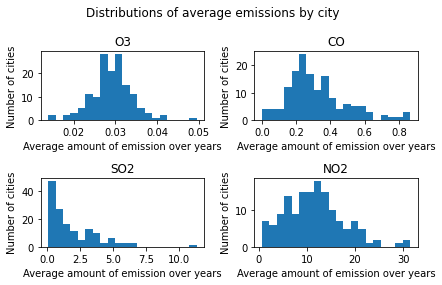

In [7]:
# Averages of pollution data all the years over each city. Showing pollution distribution among cities.
df_city = df.pivot_table(index=['City'], values=['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean'], aggfunc=np.mean)
print(df_city)

fig, ax = plt.subplots(2, 2)
fig.suptitle('Distributions of average emissions by city')
ax[0, 0].hist(df_city['O3 Mean'], bins=20)
ax[0, 0].set_title('O3')
ax[0, 0].set(xlabel='Average amount of emission over years', ylabel='Number of cities')
ax[0, 1].hist(df_city['CO Mean'], bins=20)
ax[0, 1].set_title('CO')
ax[0, 1].set(xlabel='Average amount of emission over years', ylabel='Number of cities')
ax[1, 0].hist(df_city['SO2 Mean'], bins=20)
ax[1, 0].set_title('SO2')
ax[1, 0].set(xlabel='Average amount of emission over years', ylabel='Number of cities')
ax[1, 1].hist(df_city['NO2 Mean'], bins=20)
ax[1, 1].set_title('NO2')
ax[1, 1].set(xlabel='Average amount of emission over years', ylabel='Number of cities')
plt.tight_layout()

### groupby feature

In [8]:
df.groupby('City').mean()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
City,,,,,,,,,,,,,,,,,,,
Albuquerque,2015.799195,6.390336,15.722953,0.034981,0.044860,10.313020,44.522416,0.215085,0.316913,6.177987,3.459329,0.579792,1.172537,8.745503,0.868188,10.865637,24.476242,11.296913,22.655839
Alexandria,2005.804649,6.929445,15.868679,0.031887,0.044206,10.834829,47.696982,0.310460,0.438622,7.458401,4.990212,2.937927,11.529812,10.276101,16.020392,17.949247,32.831525,12.402936,30.955546
Altoona,2003.962493,7.021130,15.883254,0.030418,0.045098,10.528262,47.571580,0.154131,0.217485,4.097728,2.381933,4.151453,12.848917,9.829371,18.276281,9.802171,21.943476,11.103011,20.680930
Annandale,2005.317951,6.603138,15.790032,0.030167,0.040961,11.154592,45.222427,0.478949,0.585602,7.088602,6.748500,5.047360,11.727734,10.852330,16.710198,14.914023,29.721274,12.417167,28.057222
Arden-Arcade,2010.611882,6.566345,15.754976,0.028366,0.042099,10.556544,44.121984,0.370411,0.583203,6.809861,6.578559,0.952418,1.904373,8.551267,2.287545,9.258798,19.434560,12.324337,18.346954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wilkes-Barre,2007.131907,6.748663,15.921569,0.030749,0.044622,10.611408,45.654189,0.208728,0.277718,5.023173,3.115865,3.111206,7.980392,8.625668,11.377897,9.360137,22.073084,11.900178,20.837790
Wilmington,2016.374288,6.272172,15.661513,0.028282,0.036984,10.855980,36.355980,0.252862,0.339870,6.000814,3.727421,0.712933,1.855452,10.644020,1.869406,10.811691,22.060985,11.082181,20.399512
Winston-Salem,2002.263918,7.226804,15.624742,0.038679,0.054726,10.492784,66.123711,0.461236,0.583093,6.350515,6.826804,3.764752,15.791753,9.781443,21.744330,10.937148,25.470103,12.435052,24.020619


## Discussion

Let's answer the two questions I brought up.

### How does yearly emission of pollutants change in the two decades?

Simply doing summation on each year and comparing them does not work. Number of cities contained in each year varies which makes it impossible to compare data across the years.

In [9]:
for city in set(df['City']):
    print(city, set(df[df['City'] == city]['Year']))

Houston {2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}
Costa Mesa {2016, 2017, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}
Reno {2016, 2017, 2018, 2019, 2020, 2021, 2010, 2011, 2012, 2013, 2014, 2015}
San Antonio {2008, 2009, 2010}
Portland {2016, 2017, 2018, 2019, 2020, 2021, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}
New Castle {2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008}
Wilmington {2016, 2017, 2018, 2019, 2020, 2021, 2011, 2012, 2013, 2014, 2015}
Scranton {2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008}
Louisville {2016, 2017, 2018, 2019, 2020, 2000, 2001, 2002, 2013, 2014, 2015}
Ladue {2000, 2001}
Sioux Falls {2016, 2017, 2018, 2019, 2020, 2021, 2011, 2012, 2013, 2014, 2015}
East Highland Park {2016, 2017, 2018, 2019, 2020, 2021, 2010, 2011, 2012, 2013, 2014, 2015}
Bethel Island {2000, 2001, 2002, 2003, 2004, 2005, 200

We can see that these cities appears in very different ranges of years in our dataset. My solution to this is picking cities have a full collection of 2000-2021 and plot their yearly average AQI.

In [10]:
# Pick out the desired cites
cities = set()
for city in set(df['City']):
    if len(set(df[df['City'] == city]['Year'])) == 22:
        cities.add(city)

dfs = []
for city in cities:
    dfs.append(df[df['City'] == city])
df_full_year = pd.concat(dfs)

Text(0, 0.5, 'API')

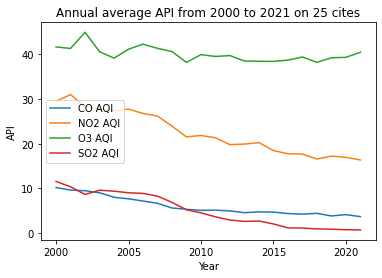

In [11]:
df_year_compare = df_full_year.pivot_table(values=['O3 AQI', 'CO AQI', 'SO2 AQI', 'NO2 AQI'], index='Year',
                                           aggfunc=np.mean)
df_year_compare.plot()
plt.title(f'Annual average API from 2000 to 2021 on {len(cities)} cites')
plt.ylabel('API')

From this figure, we find that basically all four pollutants are decreasing over the years. O3 reached a platform at around 2012 and showed a tiny increase near 2020.

### In which season does each pollutant tend to have high concentration?

Still using those cities with a full collection, we plot their average AQI in days of year.

Text(0, 0.5, 'AQI')

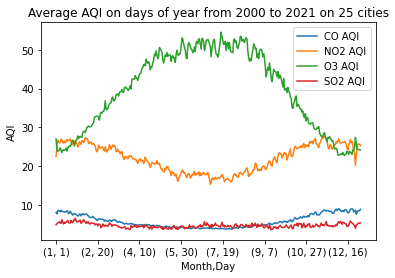

In [12]:
df_day_compare = df_full_year.pivot_table(values=['O3 AQI', 'CO AQI', 'SO2 AQI', 'NO2 AQI'], index=['Month', 'Day'],
                                          aggfunc=np.mean)
df_day_compare.plot()
plt.title(f'Average AQI on days of year from 2000 to 2021 on {len(cities)} cities')
plt.ylabel('AQI')

From this figure, it is clear that O3 increases during spring and reaches its top in summer. This is because oxygen molecular in air is more easily ionized under more powerful sunlight which contains strong ultraviolet. Meanwhile, NO2 and CO are higher during winter. This might be due to heat services running in cold weather since fuel burning could release NO2 from components in the fuel and CO from insufficient burning. SO2 remains almost the same through the whole year.